#                                Recommendation Systems Project-1

# Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)

In [0]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Reading the file and renaming the columns 
data = pd.read_csv('/content/drive/My Drive/ratings_Electronics.csv',  names = ["userId", "productId", "ratings", "timestamp"])

In [3]:
#Shape of dataset - has 4 cols and 7824482 data points.
data.shape

(7824482, 4)

In [5]:
data.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [0]:
#Dropping "timestamp" column
data=data.drop("timestamp", axis=1)

In [7]:
data.dtypes

userId        object
productId     object
ratings      float64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [0]:
#Observation: Here we come to know the datatypes of each column.

In [9]:
#checking for missing values
data.isnull().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [10]:
data.describe()

,ratings
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [0]:
#Observation : the dataset has max number of records having ratings as "5" ( more than 50% of records). Also, the mean rating is around 4 and there are no missing rows.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0aeb2803c8>]],
      dtype=object)

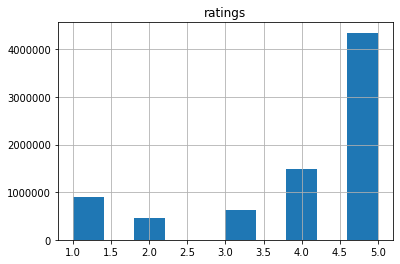

In [11]:
#sns.countplot("ratings", data=data)
data.hist("ratings")

In [0]:
#Observation : From above , we can say that the given dataset has max rows with ratings 5 and least rows with ratings 2.

In [12]:
#check the unique values in ratings column
data["ratings"].unique()

array([5., 1., 3., 2., 4.])

In [0]:
#Number of ratings given by each user - printing the top five users.
data.groupby("userId")["ratings"].count().sort_values(ascending=False).head(10)

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
Name: ratings, dtype: int64

In [0]:
#Observation: Above is the top 5 users who have given max number of ratings 

In [14]:
#checking for specific ratings count given by each user.
data.groupby("userId")["ratings"].value_counts().sort_values(ascending=False).head(10)

userId          ratings
A680RUE1FDO8B   5.0        296
A5JLAU2ARJ0BO   5.0        275
ADLVFFE4VBT8    5.0        271
A3OXHLG6DIBRW8  5.0        270
A2NOW4U7W3F7RI  5.0        245
A6FIAB28IS79    5.0        212
A25C2M3QF9G7OQ  5.0        211
A2NYK9KWFMJV4Y  5.0        209
A1CMD08Z49PGKQ  5.0        202
A2AY4YUOX2N1BQ  5.0        199
Name: ratings, dtype: int64

In [17]:
#Average rating of each product 
data.groupby('productId')['ratings'].mean().sort_values(ascending=False).head()

productId
BT008V9J9U    5.0
B0058PPK8Y    5.0
B0058OQ9Q2    5.0
B0058OKSMS    5.0
B0058OHGX2    5.0
Name: ratings, dtype: float64

In [0]:
#Observation : Above are the top 5 products having highest avg ratings. However , a product will make it to the top even if one user has rated it high.
#Lets check the number of ratings per product.

In [18]:
#Number of ratings per product
data.groupby("productId")["ratings"].count().sort_values(ascending=False).head()

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: ratings, dtype: int64

In [0]:
#Observation : top 5 products having max number of ratings

In [0]:
#Create dataframe having both the above attributes - product mean and product count.
ratings_mean_count = pd.DataFrame(data.groupby('productId')['ratings'].mean())

In [0]:
ratings_mean_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['ratings'].count())

In [21]:
ratings_mean_count["rating_counts"].sort_values(ascending=False).head()

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: rating_counts, dtype: int64

In [22]:
ratings_mean_count.head()

,ratings,rating_counts
productId,,
0132793040,5.000000,1
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27


In [0]:
ratings_mean_count = ratings_mean_count.reset_index()

In [24]:
ratings_mean_count.head()

,productId,ratings,rating_counts
0,0132793040,5.000000,1
1,0321732944,5.000000,1
2,0439886341,1.666667,3
3,0511189877,4.500000,6
4,0528881469,2.851852,27


In [0]:
#Plot a histogram for the above created dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0aeac260f0>]],
      dtype=object)

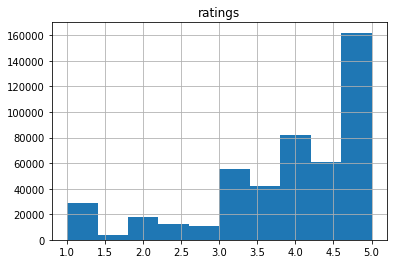

In [25]:
ratings_mean_count.hist("ratings")


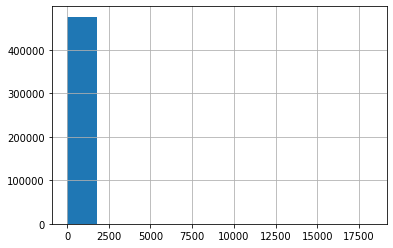

In [26]:
ratings_mean_count["rating_counts"].hist()

<Figure size 576x432 with 0 Axes>

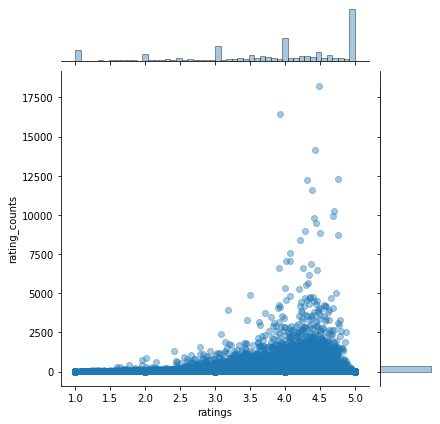

In [27]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='ratings', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [0]:
#Observation :In general, products with higher average ratings actually have more number of ratings, compared with products that have lower average ratings.

# Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [0]:
# I tried to keep all the users who have given 50 or more number of ratings but while executing the item-item based collaborative filtering, the system crashes. 
#Hence, i have taken all the users who have given 100 or more number of ratings.

In [0]:
#Create dataframe - having ratings-mean per user as well as total ratings count each user
users_ratings_mean_count = pd.DataFrame(data.groupby('userId')['ratings'].mean())

In [0]:
users_ratings_mean_count['rat_count'] = pd.DataFrame(data.groupby('userId')['ratings'].count())

In [30]:
users_ratings_mean_count.shape

(4201696, 2)

In [0]:
#  fetching unique users who have given ratings 50 or more 
data_users_50 = users_ratings_mean_count[users_ratings_mean_count["rat_count"] > 49]

In [10]:
data_users_50.shape

(1540, 2)

In [33]:
data_users_50.head()

,ratings,rat_count
userId,,
A100UD67AHFODS,4.508621,116
A100WO06OQR8BQ,3.651515,132
A105S56ODHGJEK,3.838235,68
A105TOJ6LTVMBG,3.845070,71
A10AFVU66A79Y1,4.184615,65


In [34]:
data_users_50["rat_count"].max()

520

In [38]:
data_users_50["rat_count"].min()

50

In [0]:
#Resetting index to make user id as one of the columns
data_users_50 = data_users_50.reset_index()

In [0]:
#Fetching all the rows from the initial dataset of all the users who have given 50 or more ratings 
data_final = data.loc[data["userId"].isin(data_users_50["userId"])]

In [37]:
data_final.shape

(125871, 3)

In [39]:
data_final["userId"].nunique()

1540

In [0]:
#resetting the index of the dataset
data_final = data_final.reset_index(drop=True)

In [41]:
data_final.head()

,userId,productId,ratings
0,A3BY5KCNQZXV5U,0594451647,5.0
1,AT09WGFUM934H,0594481813,3.0
2,A32HSNCNPRUMTR,0970407998,1.0
3,A17HMM1M7T9PJ1,0970407998,4.0
4,A3CLWR1UUZT6TG,0972683275,5.0


In [0]:
#Taking smaple of the dataset as the system crashes while executing the item-item collaborative model - RAM usage issue 
#I am using google collab with extended ram (around 25gb ) but still its crashing, hence taking sample
data_sample = data_final.sample(60000)

In [42]:
data_sample.shape

(60000, 3)

In [55]:
data_sample.head()

,userId,productId,ratings
116803,A2WXURU33RBGQS,B00E1HIVG8,5.0
28772,A250AXLRBVYKB4,B0011E324K,1.0
106293,A2KZOIOFXXMC1H,B00A46OZNI,4.0
32952,A206CGM6J75UJY,B0019RGQVU,5.0
31249,AG6TX1ZJHLMO7,B0015VW3BM,5.0


In [0]:
data_sample = data_sample.reset_index(drop=True)

# Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [12]:
#Installing Surprise lib
!pip install surprise

In [46]:
data_sample.columns

Index(['userId', 'productId', 'ratings'], dtype='object')

In [0]:
#We do not split the dataset for Popularity Recommender Model 
#Splitting below data for Collaborative Recommender Model

from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
reader = Reader(rating_scale=(1, 5))


In [0]:
data_s = Dataset.load_from_df(data_sample[['userId','productId', 'ratings']],reader)

In [52]:
data_s

In [0]:
#Splitting the dataset - train and test
trainset, testset = train_test_split(data_s, test_size=.30)

In [0]:
type(trainset)

surprise.trainset.Trainset

# Build Popularity Recommender model.

In [0]:
#Here train and test split is not used for Popularity based model. Hence we would take the entire dataset -  data_final which 
#has all the users how have given 50 or more ratings.

In [35]:
#Group the products by product id, calculate mean of ratings for each of its product
data_final.groupby('productId')['ratings'].mean().head()  

productId
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: ratings, dtype: float64

In [37]:
# Here we are doing same function as above  and we are sorting it in descending order and  print first 5 products having highest mean ratings with head().
data_final.groupby('productId')['ratings'].mean().sort_values(ascending=False).head()  

productId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: ratings, dtype: float64

In [0]:
#Observation : Above are the top 5 products having highest avg ratings. However , a product will make it to the top even if one user has rated it high.
#Lets check the number of ratings per product.

In [38]:
# Group the products by product id, calculate count of ratings meaning how many people rated (which was not calculated above),sort as well then  print head() 
data_final.groupby('productId')['ratings'].count().sort_values(ascending=False).head()  

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: ratings, dtype: int64

In [0]:
# New pandas dataframe with rating mean and total ratings count 
ratings_mean_counts = pd.DataFrame(data_final.groupby('productId')['ratings'].mean()) 

In [0]:
ratings_mean_counts

,ratings
productId,
0594451647,5.000000
0594481813,3.000000
0970407998,2.500000
0972683275,4.750000
1400501466,3.333333
...,...
B00LED02VY,4.000000
B00LGN7Y3G,5.000000
B00LGQ6HL8,5.000000


In [0]:
# Add a column with rating_counts in the new dataframe with count values 
ratings_mean_counts['rating_counts'] = pd.DataFrame(data_final.groupby('productId')['ratings'].count())  

In [0]:
ratings_mean_counts.head() 

,ratings,rating_counts
productId,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [41]:
# Now we can pick top n products as per need to display on the product recommendation website based on the popularity. As per the problem statement,
# we have to pick top 5 recommendations for the user. 
#This recommendation model is general - based on product popularity and not user specific unlike Collaborative model. Hence product recommendation is not user specific.
ratings_mean_counts.sort_values(by='rating_counts', ascending=False).head()

,ratings,rating_counts
productId,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149


# Build Collaborative Filtering model.

In [0]:
#User-User Based

In [35]:
# Using  user_based -  true/false to switch between user-based or item-based collaborative filtering
#Using 'cosine' instead of 'pearson_baseline' as the system crashes when executing the item-item collaborative filtering on google collab. Using 'cosine' here also 
# to keep consistency.
algo = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [17]:
#It shows all the ratings with corresponding inner ids of users and products
trainset.ur

defaultdict(list,
            {0: [(0, 4.0),
              (88, 4.0),
              (1618, 4.0),
              (2373, 3.0),
              (603, 1.0),
              (4858, 4.0),
              (167, 5.0),
              (6715, 4.0),
              (6733, 5.0),
              (6862, 5.0),
              (7196, 5.0),
              (12343, 2.0),
              (14515, 4.0),
              (13915, 5.0),
              (3100, 4.0),
              (16416, 5.0),
              (16450, 4.0),
              (5573, 3.0),
              (6672, 3.0),
              (17677, 5.0),
              (2984, 1.0),
              (18081, 5.0),
              (18145, 5.0),
              (19112, 5.0),
              (11553, 3.0),
              (21459, 4.0),
              (21768, 5.0),
              (21996, 4.0),
              (22045, 1.0),
              (4868, 3.0),
              (258, 1.0),
              (15365, 4.0),
              (22808, 3.0)],
             1: [(1, 5.0),
              (153, 4.0),
              (2922, 4.0),

In [18]:
#To fetch raw id from a given inner id 
trainset.to_raw_uid(407)

'A3LZA698SQPCXE'

In [0]:
# we can now query for specific predicions
uid = str('A3TNM3C9ENUCFW')  # raw user id
iid = str('B004M18O60')     # raw item id  	

In [20]:
# get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose=True)

user: A3TNM3C9ENUCFW item: B004M18O60 r_ui = None   est = 3.94   {'actual_k': 0, 'was_impossible': False}


In [0]:
# run the trained model against the testset
test_pred_user = algo.test(testset)

In [22]:
test_pred_user

[Prediction(uid='A1BZIM4WGZ6DZP', iid='B003WM184A', r_ui=5.0, est=4.258904761904762, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2OS3TIVAKUAHG', iid='B004NBZAI4', r_ui=3.0, est=3.8666666666666667, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A38KK0SZYEH5UD', iid='B000AMLXHW', r_ui=1.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A1EXGL6L0QQ0M5', iid='B0015A8Y3E', r_ui=5.0, est=4.338709677419355, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3FPSY1M6G7XIB', iid='B005AK2X8W', r_ui=5.0, est=4.258904761904762, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1MEISNED4NP7U', iid='B0002BEPJY', r_ui=5.0, est=4.258904761904762, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2XRMQA6PJ5ZJ8', iid='B005DKIID8', r_ui=5.0, est=4.571428571428571, details={'actual_k': 0, 'was_impossible

In [23]:
#Item - Item Based 
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_item = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})
algo_item.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [0]:
# run the trained model against the testset
test_pred_item = algo_item.test(testset)

In [25]:
test_pred_item

[Prediction(uid='A1BZIM4WGZ6DZP', iid='B003WM184A', r_ui=5.0, est=4.258904761904762, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2OS3TIVAKUAHG', iid='B004NBZAI4', r_ui=3.0, est=2.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A38KK0SZYEH5UD', iid='B000AMLXHW', r_ui=1.0, est=4.666666666666667, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A1EXGL6L0QQ0M5', iid='B0015A8Y3E', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3FPSY1M6G7XIB', iid='B005AK2X8W', r_ui=5.0, est=4.258904761904762, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1MEISNED4NP7U', iid='B0002BEPJY', r_ui=5.0, est=4.258904761904762, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2XRMQA6PJ5ZJ8', iid='B005DKIID8', r_ui=5.0, est=4.666666666666667, details={'actual_k': 0, 'was_impossible': False}),
 Pr

# Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

In [0]:
#Popularity model cannot be evaluated as it is based on general popularity of the product and not user specific unlike Collaborative model where we 
#use cosine , pearson_baseline parameters to calculate the nearest neighbors.

In [0]:
#RMSE for Collaborative model 

In [26]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_user, verbose=True)

User-based Model : Test Set
RMSE: 1.0676


1.067620802509109

In [27]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_item, verbose=True)

Item-based Model : Test Set
RMSE: 1.1475


1.147508969190998

# Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [42]:
#get top 5 recommendations using Popularity based model

# Now we can pick top n products as per need to display on the product recommendation website based on the popularity. As per the problem statement,
# we have to pick top 5 recommendations for the user. 
#This recommendation model is general - based on product popularity and not user specific unlike Collaborative model. 
#Hence product recommendation is not user specific.

ratings_mean_counts.sort_values(by='rating_counts', ascending=False).head()

,ratings,rating_counts
productId,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149


In [0]:
# Top 5 recommendations for Collaborative model 
from collections import defaultdict
def get_top_n(test_pred, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in test_pred:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, ratings in top_n.items():
        ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = ratings[:n]

    return top_n

In [0]:
#Predict ratings for all pairs (u, i) that are NOT in the training set.
testset1 = trainset.build_anti_testset()
#testset = testset.build_anti_testset()
predictions = algo.test(testset1)

In [0]:
top_n = get_top_n(predictions, n=5)

In [45]:
top_n

defaultdict(list,
            {'A1CPRP3VFJRS1R': [('B000N385QK', 4.166666666666667),
              ('B005NXL9EA', 4.166666666666667),
              ('B00HGE3C5I', 4.166666666666667),
              ('B004Q0PT3I', 4.166666666666667),
              ('B00K0F8QNI', 4.166666666666667)],
             'ARC5ASW9CUAGP': [('B000093US3', 4.0),
              ('B005NXL9EA', 4.0),
              ('B00HGE3C5I', 4.0),
              ('B004Q0PT3I', 4.0),
              ('B00K0F8QNI', 4.0)],
             'A2NP9CGUSFP22E': [('B000093US3', 5),
              ('B000N385QK', 5),
              ('B00HGE3C5I', 5),
              ('B004Q0PT3I', 5),
              ('B00K0F8QNI', 5)],
             'A2W9I628I6SE1U': [('B000093US3', 4.0),
              ('B000N385QK', 4.0),
              ('B005NXL9EA', 4.0),
              ('B004Q0PT3I', 4.0),
              ('B00K0F8QNI', 4.0)],
             'AI8EMB0HUC6Z5': [('B000093US3', 4.5),
              ('B000N385QK', 4.5),
              ('B005NXL9EA', 4.5),
              ('B00HGE3C5

In [46]:
# Print the recommended items for each user
for uid, ratings in top_n.items():
    print(uid, [iid for (iid, _) in ratings])

A1CPRP3VFJRS1R ['B000N385QK', 'B005NXL9EA', 'B00HGE3C5I', 'B004Q0PT3I', 'B00K0F8QNI']
ARC5ASW9CUAGP ['B000093US3', 'B005NXL9EA', 'B00HGE3C5I', 'B004Q0PT3I', 'B00K0F8QNI']
A2NP9CGUSFP22E ['B000093US3', 'B000N385QK', 'B00HGE3C5I', 'B004Q0PT3I', 'B00K0F8QNI']
A2W9I628I6SE1U ['B000093US3', 'B000N385QK', 'B005NXL9EA', 'B004Q0PT3I', 'B00K0F8QNI']
AI8EMB0HUC6Z5 ['B000093US3', 'B000N385QK', 'B005NXL9EA', 'B00HGE3C5I', 'B00K0F8QNI']
A2LTYEYGKBYXRR ['B000093US3', 'B000N385QK', 'B005NXL9EA', 'B00HGE3C5I', 'B004Q0PT3I']
A386LG0LRWKJZP ['B000093US3', 'B000N385QK', 'B005NXL9EA', 'B00HGE3C5I', 'B004Q0PT3I']
A3EXWV8FNSSFL6 ['B00006J053', 'B00HZ9GPTE', 'B0082N9E9U', 'B000S5Q9CA', 'B000068UXB']
A25C2M3QF9G7OQ ['B001AE30SY', 'B0000AZK0D', 'B00A6UYCT4', 'B0049U3TVE', 'B000O5N5AI']
A314KKDIJWCNMV ['B002RCNX8K', 'B00DTZYHX4', 'B006EWUO22', 'B000093US3', 'B000N385QK']
A1TY97ZGQT5FGF ['B000093US3', 'B000N385QK', 'B005NXL9EA', 'B00HGE3C5I', 'B004Q0PT3I']
A95PWI4S6WHGL ['B000093US3', 'B000N385QK', 'B005NXL9EA',

# Summarise your insights.

In [0]:
#Popularity based recommendation model is a general model which is based on recommending items purchased/viewed by most users and which are rated high.
#This model is not a personalised model.

#Collaborative based recommendation model is a personalised model based on user's past behaviour and not on the context. 
#Its based on the assumptions that - users who had similar tastes in the past would have similar tastes in the future and users give ratings to catalog items.
#It uses various distance measures like - Pearson baseline, cosine to calculate the nearest neighbours and provides 
#much better recommendations than the popularity model. 

#Hence by using the Collaborative filtering we were able to provide personalised recommendations to each user unlike popularity model where the same top 
#5 recommendations were provided to each user.